**Objective:**
**Implementation of Multiple Linear Regression**

NAME: GAUTHAM P HARISH

REGNO: 21BCE5382

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**2.Dataset Descrption**

The dataset you're referring to is related to health insurance and contains 1338 rows of insured data. The information provided for each insured individual includes the following attributes:

Age: The age of the insured person.
Sex: The gender of the insured person.
BMI (Body Mass Index): A measure of body fat based on height and weight.
Number of Children: The number of children or dependents covered by the insurance.
Smoker: Indicates whether the insured person is a smoker or not.
Region: The geographic region of the insured person.
Additionally, the dataset includes the insurance charges associated with each individual. It seems like the dataset is well-structured with no missing or undefined values, making it suitable for analysis.

The dataset can be used to explore relationships between these attributes and the insurance charges. For example, you could analyze how age, gender, BMI, smoking status, and region impact the cost of health insurance. This kind of analysis could provide insights into risk underwriting in health insurance and help understand the factors influencing insurance premiums.

In [71]:
data=pd.read_csv("insurance.csv")


**3.Exploratory Analytics**


In [72]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [73]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

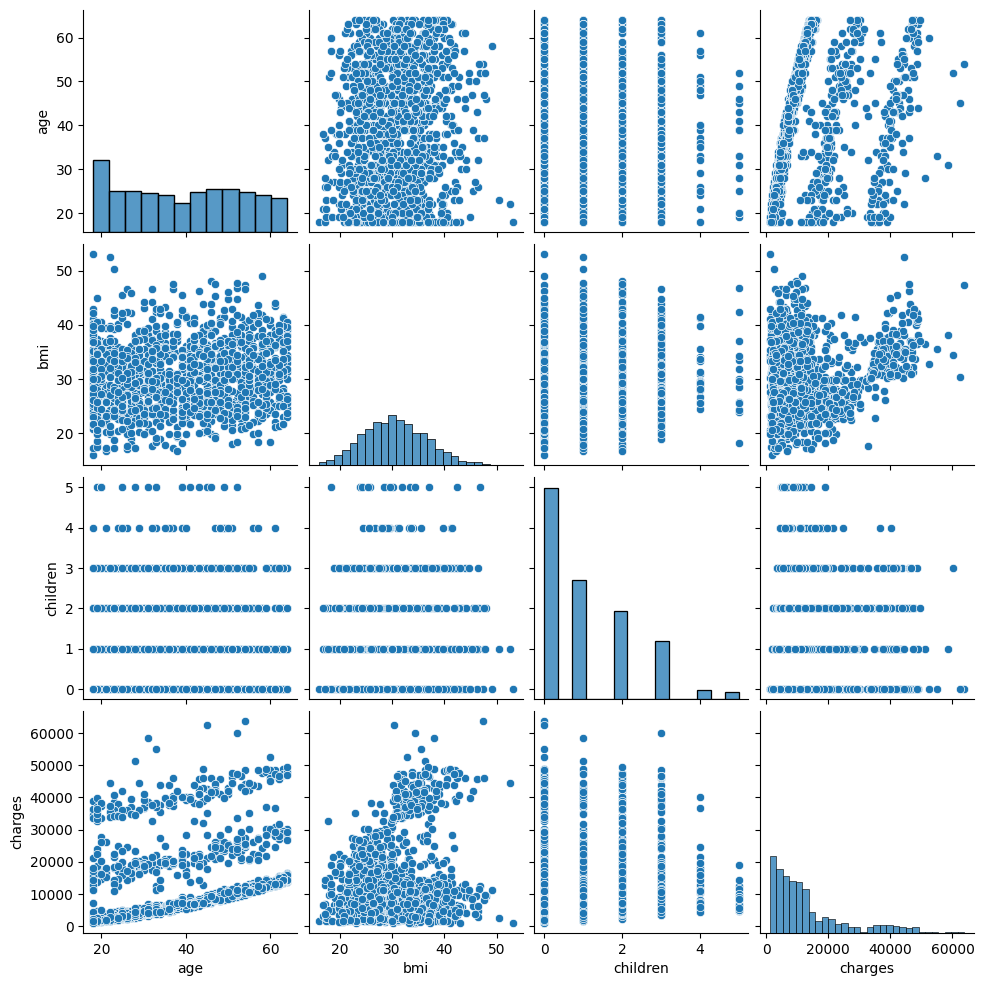

In [74]:
sns.pairplot(data)

<ipython-input-75-67f5a22b11e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

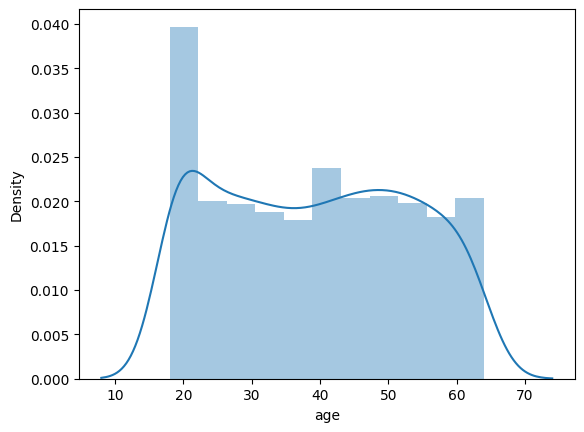

In [75]:
sns.distplot(data['age'])

<ipython-input-76-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

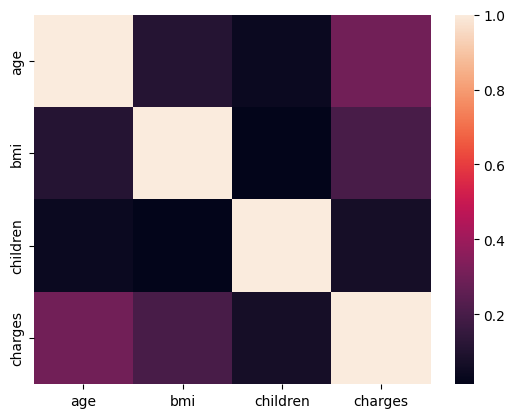

In [76]:
sns.heatmap(data.corr())

**ENCODING**

In [77]:
from sklearn.preprocessing import OneHotEncoder
encoded_data = data.copy()


data = pd.get_dummies(encoded_data, columns=['sex', 'region','smoker'], drop_first=True)


In [78]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [79]:
print(x)
print(y)

[[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]
[1 0 0 ... 0 0 1]


In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [81]:
data.head()

age     bmi  children      charges  sex_male  region_northwest  \
0   19  27.900         0  16884.92400         0                 0   
1   18  33.770         1   1725.55230         1                 0   
2   28  33.000         3   4449.46200         1                 0   
3   33  22.705         0  21984.47061         1                 1   
4   32  28.880         0   3866.85520         1                 1   

   region_southeast  region_southwest  smoker_yes  
0                 0                 1           1  
1                 1                 0           0  
2                 1                 0           0  
3                 0                 0           0  
4                 0                 0           0

**Methodology AND Multiple Model Analysis**

In [82]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [83]:
# Initialize variables to store the results
results = []

# Create a function to build a model and print summary
def build_model(features, data, model_number):
    formula = f'charges ~ {" + ".join(features)}'
    model = smf.ols(formula=formula, data=data).fit()

    # Get model performance metrics
    y_pred = model.predict(data[features])
    mse = mean_squared_error(data['charges'], y_pred)
    mae = mean_absolute_error(data['charges'], y_pred)
    rmse = np.sqrt(mse)
    r_squared = model.rsquared

    # Append results to the list
    p_values = model.pvalues[1:]  # Exclude intercept
    results.append([model_number, formula, features, mse, mae, rmse, r_squared, p_values])

    # Print model summary
    print(f"Model {model_number} - {formula}")
    print("MSE:", mse)
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R-squared:", r_squared)
    print("P-values:")
    print(p_values)
    print(model.summary())
    print("\n")


In [84]:
# Consider all features initially
all_features = ['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

# Set a threshold for p-value
p_value_threshold = 0.05

# Build models and print summary based on p-values
model_number = 1
while all_features:
    build_model(all_features, data, model_number)
    model_number += 1

    # Get p-values for all features in the current model
    p_values = smf.ols(formula=f'charges ~ {" + ".join(all_features)}', data=data).fit().pvalues[1:]  # Exclude intercept

    # Identify the feature with the highest p-value
    max_p_value_feature = p_values.idxmax()
    max_p_value = p_values[max_p_value_feature]

    # Check if the highest p-value is above the threshold
    if max_p_value > p_value_threshold:
        # Remove the feature with the highest p-value
        all_features.remove(max_p_value_feature)
    else:
        # Break the loop if all features have p-values below the threshold
        break


Model 1 - charges ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest
MSE: 36501893.00741544
MAE: 4170.886894163591
RMSE: 6041.6796511744515
R-squared: 0.7509130345985205
P-values:
age                 7.783217e-89
sex_male            6.933475e-01
bmi                 6.498194e-31
children            5.769682e-04
smoker_yes          0.000000e+00
region_northwest    4.587689e-01
region_southeast    3.078174e-02
region_southwest    4.476493e-02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:50:14   Log-Likelihood:                -13548.
No. Observatio

**Multiple regression on the best model obtained above using Scikt Learn**

In [85]:
# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['No', 'Regression Model name', 'Independent variables chosen', 'MSE', 'MAE', 'RMSE', 'R-square', 'P-values'])




In [86]:
# Choose the best model based on the lowest RMSE
best_model = results_df.loc[results_df['RMSE'].idxmin()]

# Extract features and target variable for the best model
best_features = best_model['Independent variables chosen']
X = data[best_features]
y = data['charges']


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)


LinearRegression()

**Results**

In [88]:
# Make predictions on the test set
y_pred = model_sklearn.predict(X_test)

# Evaluate the model performance on the test set
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r_squared_test = model_sklearn.score(X_test, y_test)

# Print model performance on the test set
print("Best Model -", best_model['Regression Model name'])
print("Test Set Metrics:")
print("MSE:", mse_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)
print("R-squared:", r_squared_test)


Best Model - charges ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest
Test Set Metrics:
MSE: 33981653.95019776
MAE: 4213.798594527248
RMSE: 5829.378521780667
R-squared: 0.7811147722517886


***Conclusion**

The best model is with features: age, sex_male,bmi,children,smoker_yes,region_northwest,region_southwest,region_southeast . with R_squared value of 0.78111

In [89]:
results_df

No                              Regression Model name  \
0   1  charges ~ age + sex_male + bmi + children + sm...   
1   2  charges ~ age + bmi + children + smoker_yes + ...   
2   3  charges ~ age + bmi + children + smoker_yes + ...   
3   4  charges ~ age + bmi + children + smoker_yes + ...   
4   5        charges ~ age + bmi + children + smoker_yes   

       Independent variables chosen           MSE          MAE         RMSE  \
0  [age, bmi, children, smoker_yes]  3.650189e+07  4170.886894  6041.679651   
1  [age, bmi, children, smoker_yes]  3.650617e+07  4171.709862  6042.033215   
2  [age, bmi, children, smoker_yes]  3.652118e+07  4176.076766  6043.275891   
3  [age, bmi, children, smoker_yes]  3.661939e+07  4178.221327  6051.395312   
4  [age, bmi, children, smoker_yes]  3.668046e+07  4178.681475  6056.439217   

   R-square                                           P-values  
0  0.750913  age                 7.783217e-89
sex_male     ...  
1  0.750884  age                 5.235999e-89
bmi          ...  
2  0.750781  age                 4.615106e-89
bmi          ...  
3  0.750111  age                 5.273190e-89
bmi          ...  
4  0.749695  age           1.748342e-89
bmi           1.973...

**dataset link**
https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset